In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
# %matplotlib inline

AttributeError: 'dict' object has no attribute 'InlineBackend'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity.
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt",delim_whitespace=True,header=None)
total_acc_y = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt",delim_whitespace=True,header=None)
total_acc_z = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt",delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/train/subject_train.txt",delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/train/y_train.txt",delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt",delim_whitespace=True,header=None)
total_acc_y = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt",delim_whitespace=True,header=None)
total_acc_z = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt",delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/test/subject_test.txt",delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv("/content/drive/MyDrive/es335/UCI HAR Dataset/test/y_test.txt",delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):

            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))

            label_idxs = labels[labels.iloc[:,0] == label].index

            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]

            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [6]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print(X_train)
print(y_train)
print(X_train[0][0][0])
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
[[[ 8.585207e-01 -1.691920e-01 -5.418912e-01]
  [ 8.510593e-01 -1.394993e-01 -5.303037e-01]
  [ 7.828881e-01 -7.881496e-02 -5.214045e-01]
  ...
  [ 7.826689e-01 -6.230751e-02 -4.189453e-01]
  [ 8.427363e-01 -3.418587e-02 -4.236492e-01]
  [ 9.367675e-01 -1.732876e-02 -4.193231e-01]]

 [[ 1.881076e-01  7.867169e-01  5.719042e-01]
  [ 1.900625e-01  7.862243e-01  5.730728e-01]
  [ 1.908120e-01  7.869899e-01  5.735939e-01]
  ...
  [ 1.889231e-01  7.885494e-01  5.731266e-01]
  [ 1.886773e-01  7.865748e-01  5.768984e-01]
  [ 1.875778e-01  7.836999e-01  5.770575e-01]]

 [[ 1.002935e+00 -2.017236e-02  2.438025e-01]
  [ 1.003082e+00 -2.190931e-02  2.449161e-01]
  [ 1.001252e+00 -3.188507e-02  2.529151e-01]
  ...
  [ 1.009394e+00 -8.841017e-03  1.803807e-01]
  [ 1.007835e+00 -3.991682e-05  1.880249e-01]
  [ 1.006568e+00  1.196499e-02  1.907496e-01]]

 ...

 [[-4.483281e-02  9.778022e-01  2.398303e-01]
  [-4.580035e-02  9.769460

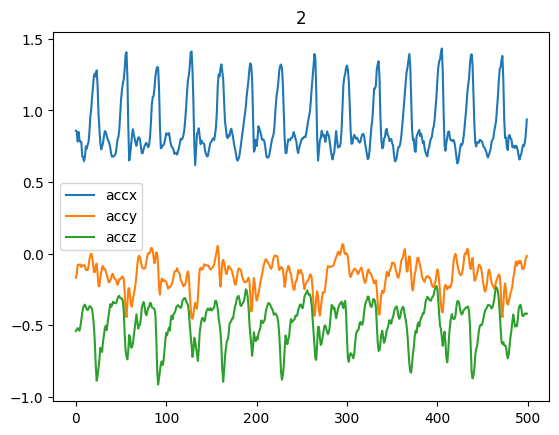

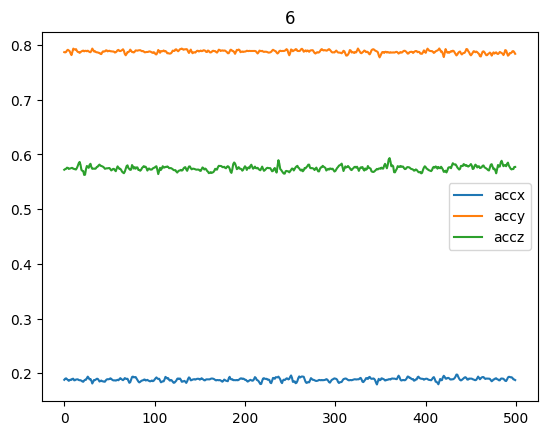

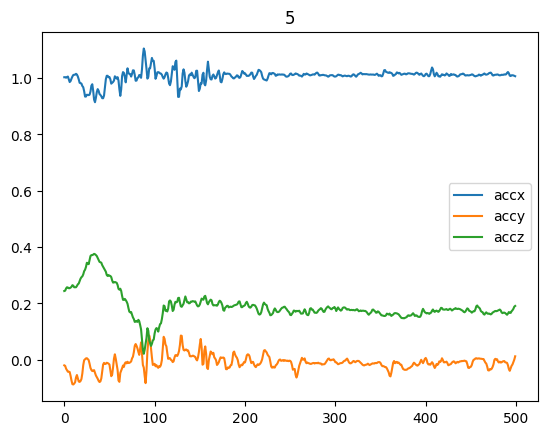

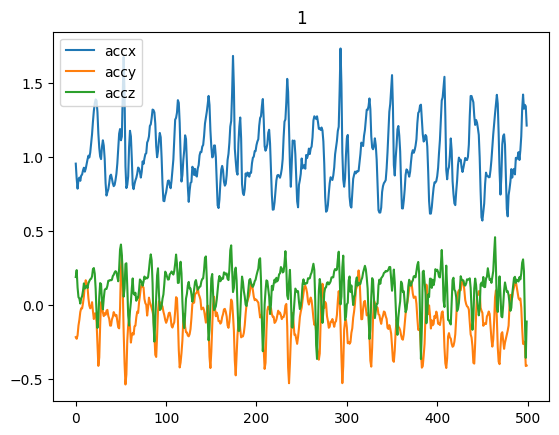

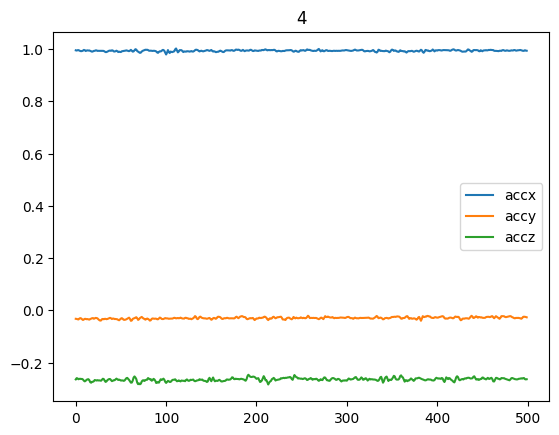

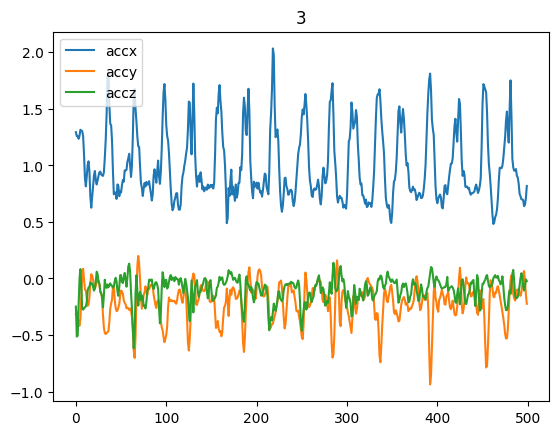

In [7]:
uniqueclass = np.unique(y_train)
d = {}
for i,j in enumerate(y_train):
  if j not in d:
    data = X_train[i]
    plt.plot(data[:,0],label="accx")
    plt.plot(data[:,1],label="accy")
    plt.plot(data[:,2],label="accz")
    plt.title(j)
    plt.legend()
    plt.show()
    d[j] = X_train

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [8]:
m = [[],[],[],[],[],[]]
for i,j in enumerate(y_train):
  c = 0
  for g in range(500):
    c += np.sqrt(np.sum(X_train[i][g]**2))
  m[j-1].append(c/500)

for i in range(6):
  print(np.mean(m[i]))


# NO it is clearly evident from linear acc data as dynamic activities have acc >1.04 while static have <1.04.



1.051890384039842
1.044489247444974
1.0430942699108618
1.0127621607929738
1.0316159969963348
1.0044099342443495


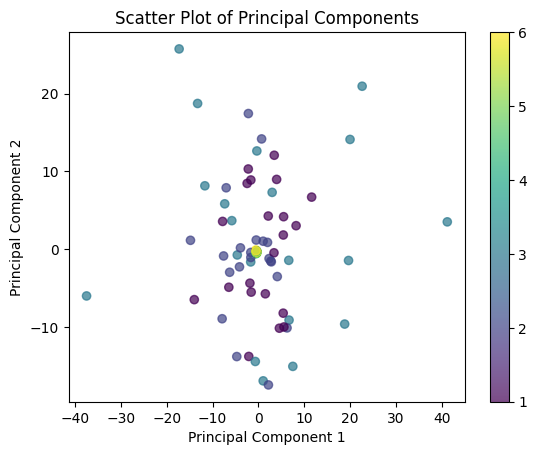

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

d = pd.DataFrame({'Activity':y_train,'accx':X_train[:,0,0],'accy':X_train[:,0,1],'accz':X_train[:,0,2]})
totalacc = np.sqrt(np.sum(X_train**2,axis=2))
# print(totalacc.shape)
s = StandardScaler()
tascaled = s.fit_transform(totalacc)
pca = PCA(n_components=2)
xpca = pca.fit_transform(tascaled)

v = [x for x in range(126)]
scatter = plt.scatter(xpca[:, 0],xpca[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatter)
plt.show()


In [12]:
!pip install tsfel

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-13-9dc92995cd83>:9: UserWarning: Using default sampling frequency set in configuration file.
  f = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***


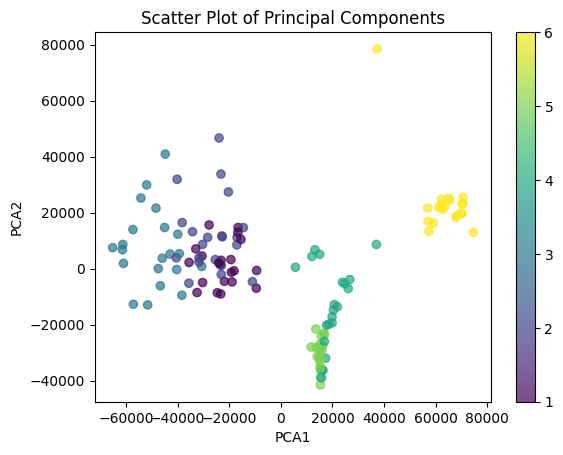

In [13]:
import tsfel

cfg = tsfel.get_features_by_domain()

flist = []
for i in range(126):
  s = X_train[i]
  df = pd.DataFrame(s,columns=['x','y','z'])
  f = tsfel.time_series_features_extractor(cfg, df)
  flist.append(f)

features = pd.concat(flist,ignore_index=True)
features["Activity"] = y_train



pca = PCA(n_components=2)
dpca = pca.fit_transform(features)
scatter = plt.scatter(dpca[:, 0], dpca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatter)
plt.show()



In [16]:
corr = features.corr()
corrd = pd.DataFrame(corr)
condition = (corrd > 0.998) & (corrd < 1)

# Iterate through DataFrame
for column in corrd.columns:
    indices = corrd.index[condition[column]]  # Get indices where condition is True
    for index in indices:
        print(f"Feature 1: {column}, Feature 2: {index}")

Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_219
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_223
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_226
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_227
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_230
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_234
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_238
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_242
Feature 1: x_FFT mean coefficient_215, Feature 2: x_FFT mean coefficient_246
Feature 1: x_FFT mean coefficient_217, Feature 2: x_FFT mean coefficient_236
Feature 1: x_FFT mean coefficient_218, Feature 2: x_FFT mean coefficient_222
Feature 1: x_FFT mean coefficient_218, Feature 2: x_FFT mean coefficient_226
Feature 1: x_FFT mean coefficient_218, Feature 2: x_FFT mean coefficient_227

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz

clf = DecisionTreeClassifier(random_state=42)

[1 2 3 4 5 6]
